# Arbeidskrav 3
### SOK-1006 Vår 2023
### Av Jonas A. Andersen


In [212]:
#laster inn diverse pakker
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown

## Oppgave 1

In [213]:
x, p, t=sp.symbols('x p t', real=True, positive=True)

def demand(x):
    return (500-x)/3.2
def supply(x, t):
    return ((100+x)/4.3) + t

equ=sp.Eq(demand(x),supply(x, t))

x_eq=sp.solve(equ,x)
x_eq = x_eq[0]

p_eq=demand(x_eq)

print("Vi får likevektspris " + str(p_eq)+ " og likevekt for kvantum " + str(x_eq))

Vi får likevektspris 0.573333333333333*t + 80.0 og likevekt for kvantum 244.0 - 1.83466666666667*t


## Oppgave 2

In [214]:
producer_surplus=sp.integrate(p_eq-supply(x, t),(x,0,x_eq))

consumer_surplus=sp.integrate(demand(x)-p_eq,(x,0,x_eq))

welfare_surplus=(sp.integrate(demand(x)-supply(x, t),(x,0,x_eq)))

avgiftsproveny = sp.integrate(t, (x, 0, x_eq))

print("Produdusentoverskudd uten gitt t verdi: " + str(sp.simplify(producer_surplus))) #sp.simplify for penere uttrykk
print("Konsumentoversludd uten gitt t verdi: " + str(sp.simplify(consumer_surplus)))
print("Samfunnsoverskuddet uten gitt t verdi: " + str(sp.simplify(welfare_surplus))) 
print("Avgiftsproveny utifra avgift t er "+ str(avgiftsproveny))

Produdusentoverskudd uten gitt t verdi: 0.391395555555555*t**2 - 104.106666666667*t + 6922.79069767442
Konsumentoversludd uten gitt t verdi: 0.525937777777778*t**2 - 139.893333333333*t + 9302.5
Samfunnsoverskuddet uten gitt t verdi: 0.917333333333333*t**2 - 244.0*t + 16225.2906976744
Avgiftsproveny utifra avgift t er t*(244.0 - 1.83466666666667*t)


## Oppgave 3

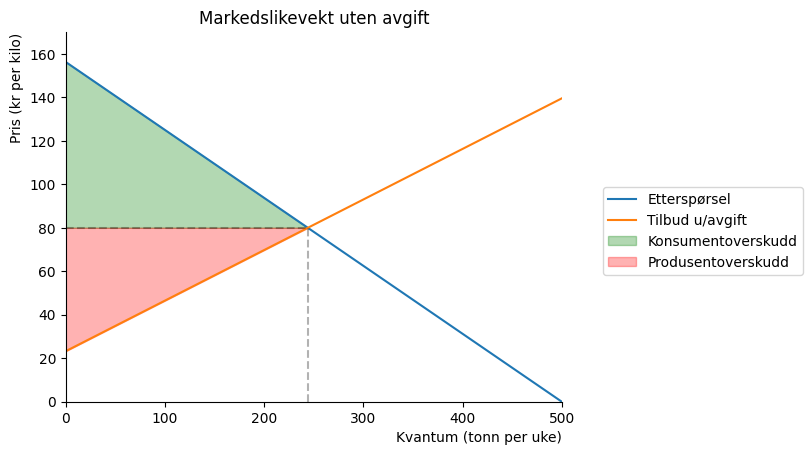

In [215]:
#liste med tall fra 0.1 til 100. 
x_num=np.linspace(0.1,500,100)

equ_t0 = sp.Eq(demand(x),supply(x, 0))

x_eq_t0 = sp.solve(equ_t0,x)
x_eq_t0 = float(x_eq_t0[0])

p_eq_t0=demand(x_eq_t0)

#lag en akse (funksjon for å kunne brukes flere ganger.)
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (kr per kilo)', loc='top')
                ax.set_xlabel('Kvantum (tonn per uke)', loc='right')
                ax.set(xlim=(0,500))
                ax.set(ylim=(0,170))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#skaper figur med funksjonen vår ovenfor
fig, ax = create_ax()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')

#tittel
ax.set_title('Markedslikevekt uten avgift')

#rekke med tall fra 0 til likevekt
q = np.linspace(0,x_eq_t0,100)

#vertikal og horisontal linje for å markere likevekt.
ax.vlines(x_eq_t0,0,demand(x_eq_t0), color='black',ls='dashed', alpha=0.3)
ax.hlines(p_eq_t0,0,x_eq_t0, color='black',ls='dashed', alpha=0.3)

#fyller inn konsument og produsent overskudd
ax.fill_between(q,p_eq_t0,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q, 0),p_eq_t0, color = "red",alpha = 0.3,label='Produsentoverskudd')

#legende
ax.legend(bbox_to_anchor=(1.5,0.6))

## Oppgave 4

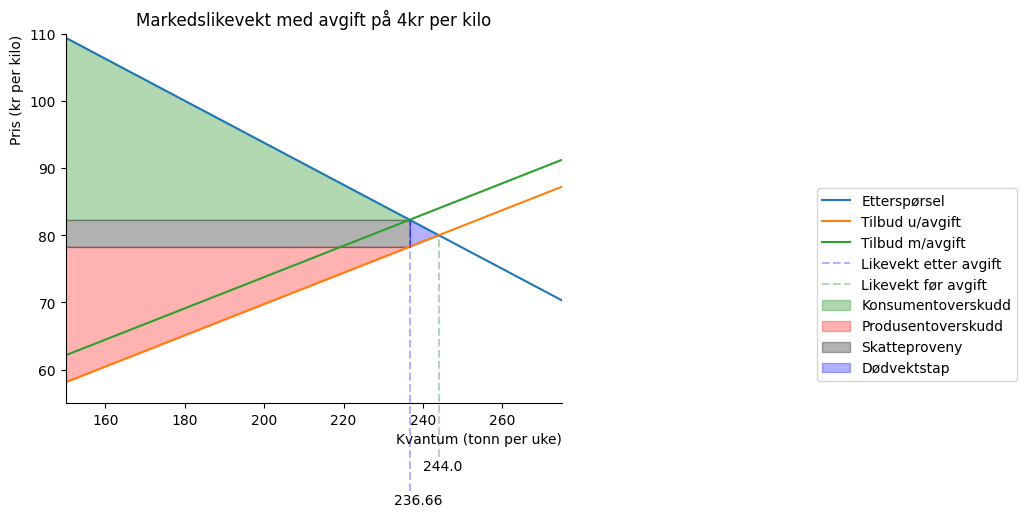

In [216]:
#liste med tall fra 0.1 til 100. 
x_num=np.linspace(0.1,500,100)

equ_t4 = sp.Eq(demand(x),supply(x, 4))

x_eq_t4 = sp.solve(equ_t4,x)
x_eq_t4 = float(x_eq_t4[0])

p_eq_t4=demand(x_eq_t4)

#lag en akse (funksjon for å kunne brukes flere ganger.)
def create_ax2():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (kr per kilo)', loc='top')
                ax.set_xlabel('Kvantum (tonn per uke)', loc='right')
                ax.set(xlim=(150,275))
                ax.set(ylim=(55,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#skaper figur med funksjonen vår ovenfor
fig, ax = create_ax2()

#plotter funksjonen
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud u/avgift')
ax.plot(x_num, supply(x_num, 4), label='Tilbud m/avgift')

#tittel
ax.set_title('Markedslikevekt med avgift på 4kr per kilo')

#rekke med tall fra 0 til likevekt
q2 = np.linspace(0,x_eq_t4,100)

#rekke med tall fra likevekt med avgift til likevekt uten avgift
q3 = np.linspace(x_eq_t0,x_eq_t4,100)

#vertikallinjer for å markere likevekt.
ax.vlines(x_eq_t4,42,demand(x_eq_t4), color='b',ls='dashed', alpha= 0.3, label='Likevekt etter avgift', clip_on=False) #clipon false gjør at vlines clipper gjennom rammen.
ax.vlines(x_eq_t0,47,demand(x_eq_t0), color='g',ls='dashed', alpha= 0.3, label='Likevekt før avgift', clip_on=False)

#tekst for likevektkvantum
ax.annotate(round(x_eq_t0, 2), xy=(round(x_eq_t0, 2)-4, 45), annotation_clip=False)
ax.annotate(round(x_eq_t4, 2), xy=(round(x_eq_t4, 2)-4, 40), annotation_clip=False)


#fyller inn konsument og produsent overskudd
ax.fill_between(q2,p_eq_t4,demand(q2), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q2,supply(q2, 0),p_eq_t4-4, color = "red",alpha = 0.3,label='Produsentoverskudd')
ax.fill_between(q2,p_eq_t4,p_eq_t4-4, color = "black",alpha = 0.3,label='Skatteproveny')
ax.fill_between(q3,supply(q3, 0),demand(q3), color = "blue",alpha = 0.3,label='Dødvektstap')


#legende
ax.legend(bbox_to_anchor=(1.5,0.6))



## Oppgave 5

In [217]:
#diverse mellomregninger
prod_surplus_t0 = sp.integrate(p_eq_t0-supply(x, 0),(x,0,x_eq_t0)) #produsentoverskudd uten avgift
cons_surplus_t0 =sp.integrate(demand(x)-p_eq_t0,(x,0,x_eq_t0)) #konsumentoverskudd uten avgift

prod_surplus_t4 = sp.integrate(p_eq_t4 - 4 - supply(x, 0), (x, 0, x_eq_t4)) #produsentoverskudd med avgift t=4
cons_surplus_t4 = sp.integrate(demand(x)-p_eq_t4, (x, 0, x_eq_t4)) #konsumentoverskudd med avgift t=4

skatteproveny = sp.integrate(4, (x, 0, x_eq_t4)) #skatteproveny med avgift t=4
dødvektstap = sp.integrate(demand(x) - supply(x, 0), (x, x_eq_t4, x_eq_t0)) #dødvektstap ved avgift t=4

tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:   | ${p_eq_t0 }$    | ${round(p_eq_t4, 2)}$| ${round(p_eq_t4 - p_eq_t0, 2)}$  |
|Produsentpris:  | ${p_eq_t0 }$ | ${round(p_eq_t4, 2)-4 }$  | ${round(p_eq_t4-4 - p_eq_t0, 2)}$ |
|Kvantum:  | ${round(x_eq_t0, 2)}$  | ${round(x_eq_t4, 2)}$   |  ${round(x_eq_t4 - x_eq_t0, 2)}$  |
| Konsumentoverskudd: | ${round(cons_surplus_t0, 2)}$ |${round(cons_surplus_t4, 2)}$ |  ${round(cons_surplus_t4 - cons_surplus_t0, 2)}$   |
| Produsentoverskudd: | ${round(prod_surplus_t0, 2)}$ | ${round(prod_surplus_t4, 2)}$ |  ${round(prod_surplus_t4 - prod_surplus_t0, 2)}$ |
| KO + PO:    |  ${round(prod_surplus_t0 + cons_surplus_t0, 2)}$   | ${round(prod_surplus_t4 + cons_surplus_t4, 2)}$| ${round((round(prod_surplus_t4 + cons_surplus_t4, 2)) - (round(prod_surplus_t0 + cons_surplus_t0, 2)), 2)}$ |
|Skatteproveny :| ${0}$  |${round(skatteproveny, 2)}$ | ${round(skatteproveny, 2) - 0}$|
| Dødvektstap:  |${0}$   | ${round(dødvektstap, 2)}$ | ${round(dødvektstap, 2) - 0}$|
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:   | $80.0$    | $82.29$| $2.29$  |
|Produsentpris:  | $80.0$ | $78.29$  | $-1.71$ |
|Kvantum:  | $244.0$  | $236.66$   |  $-7.34$  |
| Konsumentoverskudd: | $9302.50$ |$8751.34$ |  $-551.16$   |
| Produsentoverskudd: | $6922.79$ | $6512.63$ |  $-410.16$ |
| KO + PO:    |  $16225.29$   | $15263.97$| $-961.32$ |
|Skatteproveny :| $0$  |$946.65$ | $946.65$|
| Dødvektstap:  |$0$   | $14.68$ | $14.68$|
